## 1. Import packages and Load dataset

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
pip install --index-url https://test.pypi.org/simple/ --no-deps my_krml_ratana

Looking in indexes: https://test.pypi.org/simple/
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
from my_krml_ratana.data.sets import df_report

In [4]:
df = pd.read_csv('../../data/interim/df_master.csv')

In [5]:
df

,cc_num,gender,city,state,zip,lat,long,city_pop,acct_num,job_category,age,trans_num,category,amt,is_fraud,merchant,merch_lat,merch_long,timestamp
0,4218196001337,M,Ambler,PA,19002,40.1809,-75.2156,32412,888022315787,Finance,65,91ab12e73ef38206e1121e9648d2408d,gas_transport,69.12,0,Phillips Group,39.491416,-75.588522,2019-05-24 17:39:10
1,4218196001337,M,Ambler,PA,19002,40.1809,-75.2156,32412,888022315787,Finance,65,071553d533a6822a4431c354c434ddcb,grocery_pos,68.11,0,Tucker Ltd,40.890319,-75.573359,2019-09-25 15:31:59
2,4218196001337,M,Ambler,PA,19002,40.1809,-75.2156,32412,888022315787,Finance,65,0cfad38ef15e4749eff68dc83f62c151,misc_net,40.35,0,Dixon PLC,39.244958,-74.475327,2019-12-24 16:40:01
3,4218196001337,M,Ambler,PA,19002,40.1809,-75.2156,32412,888022315787,Finance,65,5782693d7c70f062f258cb30bfa8900f,grocery_pos,96.22,0,Lambert-Cooper,39.656925,-75.802342,2019-10-18 19:50:38
4,4218196001337,M,Ambler,PA,19002,40.1809,-75.2156,32412,888022315787,Finance,65,35fd7db657d7e30dd608c37f7798186e,gas_transport,71.89,0,Griffith LLC,40.313342,-74.220434,2019-02-10 23:13:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260899,343251790447085,M,Saint Petersburg,FL,33710,27.7898,-82.7243,341043,298026601683,Engineering,82,4eafc5b16da625c3436f2484d8dcabcb,health_fitness,7.47,0,"Horton, Ware and Reynolds",27.707908,-82.320308,2021-07-30 09:22:23
4260900,343251790447085,M,Saint Petersburg,FL,33710,27.7898,-82.7243,341043,298026601683,Engineering,82,041b18f68b893b68e7aa29c16a08a08d,food_dining,2.30,0,Hanson and Sons,27.896372,-83.387356,2021-06-28 11:38:46
4260901,343251790447085,M,Saint Petersburg,FL,33710,27.7898,-82.7243,341043,298026601683,Engineering,82,a26df5348dfee4839f0fa00155e2ed1c,health_fitness,5.82,0,White LLC,27.110602,-82.426821,2021-08-24 09:37:49
4260902,343251790447085,M,Saint Petersburg,FL,33710,27.7898,-82.7243,341043,298026601683,Engineering,82,e388fc8055b1426c62640baaae10108f,health_fitness,9.16,0,Snyder-Johnson,28.110510,-81.891797,2021-08-26 11:16:35


## 2. Creating target variable

Since our goal is to predict monthly spending of each customer for next month we need to create a monthly spending amount (target variable)

Before building the model we need to consider if there are enough data points to create one model per customers. This is important when we decide train/test/validation split
   

In [6]:
transaction_counts = df.groupby('cc_num').size().reset_index(name='transaction_count')

In [7]:
transaction_counts

,cc_num,transaction_count
0,60400268763,5101
1,60406155816,6910
2,60429276409,7631
3,60432200743,5454
4,60434956110,9476
...,...,...
978,4966177182498980888,3639
979,4967150066664110652,7630
980,4968827697040953141,4384
981,4983665528993160877,5096


In [8]:
# Create year and month features from timestamp

df['timestamp'] = pd.to_datetime(df['timestamp'])

df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month

In [9]:
df

,cc_num,gender,city,state,zip,lat,long,city_pop,acct_num,job_category,...,trans_num,category,amt,is_fraud,merchant,merch_lat,merch_long,timestamp,year,month
0,4218196001337,M,Ambler,PA,19002,40.1809,-75.2156,32412,888022315787,Finance,...,91ab12e73ef38206e1121e9648d2408d,gas_transport,69.12,0,Phillips Group,39.491416,-75.588522,2019-05-24 17:39:10,2019,5
1,4218196001337,M,Ambler,PA,19002,40.1809,-75.2156,32412,888022315787,Finance,...,071553d533a6822a4431c354c434ddcb,grocery_pos,68.11,0,Tucker Ltd,40.890319,-75.573359,2019-09-25 15:31:59,2019,9
2,4218196001337,M,Ambler,PA,19002,40.1809,-75.2156,32412,888022315787,Finance,...,0cfad38ef15e4749eff68dc83f62c151,misc_net,40.35,0,Dixon PLC,39.244958,-74.475327,2019-12-24 16:40:01,2019,12
3,4218196001337,M,Ambler,PA,19002,40.1809,-75.2156,32412,888022315787,Finance,...,5782693d7c70f062f258cb30bfa8900f,grocery_pos,96.22,0,Lambert-Cooper,39.656925,-75.802342,2019-10-18 19:50:38,2019,10
4,4218196001337,M,Ambler,PA,19002,40.1809,-75.2156,32412,888022315787,Finance,...,35fd7db657d7e30dd608c37f7798186e,gas_transport,71.89,0,Griffith LLC,40.313342,-74.220434,2019-02-10 23:13:20,2019,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260899,343251790447085,M,Saint Petersburg,FL,33710,27.7898,-82.7243,341043,298026601683,Engineering,...,4eafc5b16da625c3436f2484d8dcabcb,health_fitness,7.47,0,"Horton, Ware and Reynolds",27.707908,-82.320308,2021-07-30 09:22:23,2021,7
4260900,343251790447085,M,Saint Petersburg,FL,33710,27.7898,-82.7243,341043,298026601683,Engineering,...,041b18f68b893b68e7aa29c16a08a08d,food_dining,2.30,0,Hanson and Sons,27.896372,-83.387356,2021-06-28 11:38:46,2021,6
4260901,343251790447085,M,Saint Petersburg,FL,33710,27.7898,-82.7243,341043,298026601683,Engineering,...,a26df5348dfee4839f0fa00155e2ed1c,health_fitness,5.82,0,White LLC,27.110602,-82.426821,2021-08-24 09:37:49,2021,8
4260902,343251790447085,M,Saint Petersburg,FL,33710,27.7898,-82.7243,341043,298026601683,Engineering,...,e388fc8055b1426c62640baaae10108f,health_fitness,9.16,0,Snyder-Johnson,28.110510,-81.891797,2021-08-26 11:16:35,2021,8


In [10]:
# Number of transaction per year
transaction_counts = df.groupby(['cc_num', 'year']).size().reset_index(name='transaction_count')

In [11]:
transaction_counts.head(50)

,cc_num,year,transaction_count
0,60400268763,2018,1
1,60400268763,2019,1130
2,60400268763,2020,1110
3,60400268763,2021,1092
4,60400268763,2022,1768
5,60406155816,2018,1
6,60406155816,2019,1446
7,60406155816,2020,1436
8,60406155816,2021,1442
9,60406155816,2022,2585


In [12]:
# Number of transaction per month
transaction_counts = df.groupby(['cc_num', 'month']).size().reset_index(name='transaction_count')

In [13]:
transaction_counts.describe()

,cc_num,month,transaction_count
count,1.167900e+04,11679.000000,11679.000000
mean,3.718194e+17,6.497474,364.834661
std,1.236831e+18,3.452162,239.906251
min,6.040027e+10,1.000000,3.000000
25%,1.800364e+14,3.000000,189.000000
50%,3.517536e+15,6.000000,323.000000
75%,4.536938e+15,9.000000,490.000000
max,4.986227e+18,12.000000,1748.000000


The minimum transaction per month for each customers is 3. 

### [2.1] Aggregate monthly spending for each customers

In [14]:
df.columns

Index(['cc_num', 'gender', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'acct_num', 'job_category', 'age', 'trans_num', 'category', 'amt',
       'is_fraud', 'merchant', 'merch_lat', 'merch_long', 'timestamp', 'year',
       'month'],
      dtype='object')

In [15]:
# Total monthly spending
monthly_spending = df.groupby(['cc_num', 'year', 'month'])['amt'].sum().reset_index()
monthly_spending

,cc_num,year,month,amt
0,60400268763,2018,12,5.39
1,60400268763,2019,1,3152.91
2,60400268763,2019,2,9242.60
3,60400268763,2019,3,5701.32
4,60400268763,2019,4,6016.01
...,...,...,...,...
43797,4986226992066617996,2022,8,4962.25
43798,4986226992066617996,2022,9,4168.69
43799,4986226992066617996,2022,10,12604.28
43800,4986226992066617996,2022,11,3604.19


In [16]:
monthly_spending.rename(columns={'amt': 'total_monthly_spending'}, inplace=True)

In [17]:
monthly_spending

,cc_num,year,month,total_monthly_spending
0,60400268763,2018,12,5.39
1,60400268763,2019,1,3152.91
2,60400268763,2019,2,9242.60
3,60400268763,2019,3,5701.32
4,60400268763,2019,4,6016.01
...,...,...,...,...
43797,4986226992066617996,2022,8,4962.25
43798,4986226992066617996,2022,9,4168.69
43799,4986226992066617996,2022,10,12604.28
43800,4986226992066617996,2022,11,3604.19


## 3. Feature Engineering

### [3.1] Monthly spending by Categories

In [18]:
# Monthly spending by category
# Use pivot table to calculate spending by category
category_spending = df.pivot_table(
    index = ['cc_num', 'year', 'month'],
    columns = 'category',
    values = 'amt',
    aggfunc = 'sum',
    fill_value = 0
).reset_index()


In [19]:
category_spending

category,cc_num,year,month,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,60400268763,2018,12,0.00,0.00,5.39,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00
1,60400268763,2019,1,0.00,0.00,3152.91,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00
2,60400268763,2019,2,0.00,0.00,9242.60,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00
3,60400268763,2019,3,0.00,0.00,5701.32,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00
4,60400268763,2019,4,0.00,0.00,6016.01,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43797,4986226992066617996,2022,8,4452.26,340.38,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,169.61,0.00
43798,4986226992066617996,2022,9,0.00,4168.69,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00
43799,4986226992066617996,2022,10,0.00,0.00,0.00,0.0,0.0,11452.41,1151.87,0.00,0.0,0.0,0.00,0.0,0.00,0.00
43800,4986226992066617996,2022,11,0.00,0.00,0.00,0.0,0.0,0.00,1978.56,1625.63,0.0,0.0,0.00,0.0,0.00,0.00


In [20]:
# Lag for total monthly spending
monthly_spending['spending_lag_1'] = monthly_spending.groupby('cc_num')['total_monthly_spending'].shift(1)


In [21]:
# 2nd order lag
monthly_spending['spending_lag_2'] = monthly_spending.groupby('cc_num')['total_monthly_spending'].shift(2)

In [22]:
# 3rd order lag
monthly_spending['spending_lag_3'] = monthly_spending.groupby('cc_num')['total_monthly_spending'].shift(3)

In [23]:
monthly_spending

,cc_num,year,month,total_monthly_spending,spending_lag_1,spending_lag_2,spending_lag_3
0,60400268763,2018,12,5.39,NaN,NaN,NaN
1,60400268763,2019,1,3152.91,5.39,NaN,NaN
2,60400268763,2019,2,9242.60,3152.91,5.39,NaN
3,60400268763,2019,3,5701.32,9242.60,3152.91,5.39
4,60400268763,2019,4,6016.01,5701.32,9242.60,3152.91
...,...,...,...,...,...,...,...
43797,4986226992066617996,2022,8,4962.25,6822.38,4743.58,4824.19
43798,4986226992066617996,2022,9,4168.69,4962.25,6822.38,4743.58
43799,4986226992066617996,2022,10,12604.28,4168.69,4962.25,6822.38
43800,4986226992066617996,2022,11,3604.19,12604.28,4168.69,4962.25


In [24]:
# Number of transactions per month
monthly_trans = df.groupby(['cc_num', 'year', 'month'])['trans_num'].count().reset_index()
monthly_trans.rename(columns={'trans_num': 'num_transactions'}, inplace = True)
monthly_trans

,cc_num,year,month,num_transactions
0,60400268763,2018,12,1
1,60400268763,2019,1,64
2,60400268763,2019,2,58
3,60400268763,2019,3,92
4,60400268763,2019,4,72
...,...,...,...,...
43797,4986226992066617996,2022,8,127
43798,4986226992066617996,2022,9,105
43799,4986226992066617996,2022,10,110
43800,4986226992066617996,2022,11,102


In [25]:
# Merge data
new_data = pd.merge(monthly_spending, category_spending, on=['cc_num', 'year', 'month'])
new_data = pd.merge(new_data, monthly_trans, on=['cc_num', 'year', 'month'])


In [26]:
new_data.head(20)

,cc_num,year,month,total_monthly_spending,spending_lag_1,spending_lag_2,spending_lag_3,entertainment,food_dining,gas_transport,...,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,num_transactions
0,60400268763,2018,12,5.39,NaN,NaN,NaN,0.0,0.0,5.39,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,1
1,60400268763,2019,1,3152.91,5.39,NaN,NaN,0.0,0.0,3152.91,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,64
2,60400268763,2019,2,9242.60,3152.91,5.39,NaN,0.0,0.0,9242.60,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,58
3,60400268763,2019,3,5701.32,9242.60,3152.91,5.39,0.0,0.0,5701.32,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,92
4,60400268763,2019,4,6016.01,5701.32,9242.60,3152.91,0.0,0.0,6016.01,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,72
5,60400268763,2019,5,6040.05,6016.01,5701.32,9242.60,0.0,0.0,6040.05,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,93
6,60400268763,2019,6,8893.32,6040.05,6016.01,5701.32,0.0,0.0,5029.69,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,103
7,60400268763,2019,7,6339.15,8893.32,6040.05,6016.01,0.0,0.0,0.00,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,120
8,60400268763,2019,8,6750.15,6339.15,8893.32,6040.05,0.0,0.0,0.00,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,109
9,60400268763,2019,9,7976.41,6750.15,6339.15,8893.32,0.0,0.0,0.00,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,95


In [27]:
new_data.describe()

,cc_num,year,month,total_monthly_spending,spending_lag_1,spending_lag_2,spending_lag_3,entertainment,food_dining,gas_transport,...,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,num_transactions
count,4.380200e+04,43802.000000,43802.000000,43802.000000,42819.000000,41844.000000,40871.000000,43802.000000,43802.000000,43802.000000,...,43802.000000,43802.000000,43802.000000,43802.000000,43802.000000,43802.000000,43802.000000,43802.000000,43802.000000,43802.000000
mean,3.786762e+17,2020.507397,6.569426,6710.899103,6478.400782,6433.537043,6382.177968,466.675414,474.387358,578.845413,...,386.255558,587.017547,537.640015,351.022849,486.885205,437.769407,481.789646,647.189164,194.956074,97.276471
std,1.246439e+18,1.157670,3.485047,5474.223780,5075.153652,5056.346598,5035.005922,1654.504847,1715.569438,1695.350885,...,1585.500161,1962.259584,1841.526941,1838.968348,1770.128277,1765.267578,1778.480385,2154.070192,1483.116135,70.254364
min,6.040027e+10,2018.000000,1.000000,1.060000,1.060000,1.060000,1.060000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.800311e+14,2019.000000,4.000000,2985.050000,2938.380000,2915.000000,2884.045000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49.000000
50%,3.517152e+15,2021.000000,7.000000,5240.545000,5150.460000,5113.425000,5066.140000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,82.000000
75%,4.567783e+15,2022.000000,10.000000,8663.995000,8414.715000,8340.110000,8262.330000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,127.000000
max,4.986227e+18,2022.000000,12.000000,62141.320000,46454.680000,46454.680000,46454.680000,34699.280000,28770.040000,17448.960000,...,38012.050000,34321.170000,30114.530000,32467.590000,24528.170000,32990.930000,44374.490000,34118.360000,33447.620000,778.000000


In [28]:
df['category'].nunique()

14

Pivoting category and using it as a feature may increase the cardinality. But the number of unique categories is manageable (e.g., less than 20-30), including them might not be problematic and may add valuable insights. Later we will experiment with and without category to see the impact on RMSE

In [29]:
df

,cc_num,gender,city,state,zip,lat,long,city_pop,acct_num,job_category,...,trans_num,category,amt,is_fraud,merchant,merch_lat,merch_long,timestamp,year,month
0,4218196001337,M,Ambler,PA,19002,40.1809,-75.2156,32412,888022315787,Finance,...,91ab12e73ef38206e1121e9648d2408d,gas_transport,69.12,0,Phillips Group,39.491416,-75.588522,2019-05-24 17:39:10,2019,5
1,4218196001337,M,Ambler,PA,19002,40.1809,-75.2156,32412,888022315787,Finance,...,071553d533a6822a4431c354c434ddcb,grocery_pos,68.11,0,Tucker Ltd,40.890319,-75.573359,2019-09-25 15:31:59,2019,9
2,4218196001337,M,Ambler,PA,19002,40.1809,-75.2156,32412,888022315787,Finance,...,0cfad38ef15e4749eff68dc83f62c151,misc_net,40.35,0,Dixon PLC,39.244958,-74.475327,2019-12-24 16:40:01,2019,12
3,4218196001337,M,Ambler,PA,19002,40.1809,-75.2156,32412,888022315787,Finance,...,5782693d7c70f062f258cb30bfa8900f,grocery_pos,96.22,0,Lambert-Cooper,39.656925,-75.802342,2019-10-18 19:50:38,2019,10
4,4218196001337,M,Ambler,PA,19002,40.1809,-75.2156,32412,888022315787,Finance,...,35fd7db657d7e30dd608c37f7798186e,gas_transport,71.89,0,Griffith LLC,40.313342,-74.220434,2019-02-10 23:13:20,2019,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260899,343251790447085,M,Saint Petersburg,FL,33710,27.7898,-82.7243,341043,298026601683,Engineering,...,4eafc5b16da625c3436f2484d8dcabcb,health_fitness,7.47,0,"Horton, Ware and Reynolds",27.707908,-82.320308,2021-07-30 09:22:23,2021,7
4260900,343251790447085,M,Saint Petersburg,FL,33710,27.7898,-82.7243,341043,298026601683,Engineering,...,041b18f68b893b68e7aa29c16a08a08d,food_dining,2.30,0,Hanson and Sons,27.896372,-83.387356,2021-06-28 11:38:46,2021,6
4260901,343251790447085,M,Saint Petersburg,FL,33710,27.7898,-82.7243,341043,298026601683,Engineering,...,a26df5348dfee4839f0fa00155e2ed1c,health_fitness,5.82,0,White LLC,27.110602,-82.426821,2021-08-24 09:37:49,2021,8
4260902,343251790447085,M,Saint Petersburg,FL,33710,27.7898,-82.7243,341043,298026601683,Engineering,...,e388fc8055b1426c62640baaae10108f,health_fitness,9.16,0,Snyder-Johnson,28.110510,-81.891797,2021-08-26 11:16:35,2021,8


In [30]:
new_data

,cc_num,year,month,total_monthly_spending,spending_lag_1,spending_lag_2,spending_lag_3,entertainment,food_dining,gas_transport,...,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,num_transactions
0,60400268763,2018,12,5.39,NaN,NaN,NaN,0.00,0.00,5.39,...,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,1
1,60400268763,2019,1,3152.91,5.39,NaN,NaN,0.00,0.00,3152.91,...,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,64
2,60400268763,2019,2,9242.60,3152.91,5.39,NaN,0.00,0.00,9242.60,...,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,58
3,60400268763,2019,3,5701.32,9242.60,3152.91,5.39,0.00,0.00,5701.32,...,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,92
4,60400268763,2019,4,6016.01,5701.32,9242.60,3152.91,0.00,0.00,6016.01,...,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43797,4986226992066617996,2022,8,4962.25,6822.38,4743.58,4824.19,4452.26,340.38,0.00,...,0.00,0.00,0.00,0.0,0.0,0.00,0.0,169.61,0.00,127
43798,4986226992066617996,2022,9,4168.69,4962.25,6822.38,4743.58,0.00,4168.69,0.00,...,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,105
43799,4986226992066617996,2022,10,12604.28,4168.69,4962.25,6822.38,0.00,0.00,0.00,...,11452.41,1151.87,0.00,0.0,0.0,0.00,0.0,0.00,0.00,110
43800,4986226992066617996,2022,11,3604.19,12604.28,4168.69,4962.25,0.00,0.00,0.00,...,0.00,1978.56,1625.63,0.0,0.0,0.00,0.0,0.00,0.00,102


In [31]:
df.columns

Index(['cc_num', 'gender', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'acct_num', 'job_category', 'age', 'trans_num', 'category', 'amt',
       'is_fraud', 'merchant', 'merch_lat', 'merch_long', 'timestamp', 'year',
       'month'],
      dtype='object')

In [32]:
# We want gender, city, city_pop, age, job_category as features to predict total monthly spending
df_2 = df[['cc_num', 'gender', 'city_pop', 'job_category', 'age', 'year', 'month']]
df_2


,cc_num,gender,city_pop,job_category,age,year,month
0,4218196001337,M,32412,Finance,65,2019,5
1,4218196001337,M,32412,Finance,65,2019,9
2,4218196001337,M,32412,Finance,65,2019,12
3,4218196001337,M,32412,Finance,65,2019,10
4,4218196001337,M,32412,Finance,65,2019,2
...,...,...,...,...,...,...,...
4260899,343251790447085,M,341043,Engineering,82,2021,7
4260900,343251790447085,M,341043,Engineering,82,2021,6
4260901,343251790447085,M,341043,Engineering,82,2021,8
4260902,343251790447085,M,341043,Engineering,82,2021,8


In [42]:
# Group by cc_num, year, and month to ensure the same row with new_df
df_grouped = df_2.groupby(['cc_num', 'year', 'month'], as_index=False).first()
df_grouped

,cc_num,year,month,gender,city_pop,job_category,age
0,60400268763,2018,12,M,270712,Science and Research,67
1,60400268763,2019,1,M,270712,Science and Research,67
2,60400268763,2019,2,M,270712,Science and Research,67
3,60400268763,2019,3,M,270712,Science and Research,67
4,60400268763,2019,4,M,270712,Science and Research,67
...,...,...,...,...,...,...,...
43797,4986226992066617996,2022,8,M,9760,Healthcare,26
43798,4986226992066617996,2022,9,M,9760,Healthcare,26
43799,4986226992066617996,2022,10,M,9760,Healthcare,26
43800,4986226992066617996,2022,11,M,9760,Healthcare,26


In [46]:
final_df = pd.merge(new_data, df_grouped, on=['cc_num', 'year', 'month'], how = 'left')

In [47]:
final_df.head(20)

,cc_num,year,month,total_monthly_spending,spending_lag_1,spending_lag_2,spending_lag_3,entertainment,food_dining,gas_transport,...,misc_pos,personal_care,shopping_net,shopping_pos,travel,num_transactions,gender,city_pop,job_category,age
0,60400268763,2018,12,5.39,NaN,NaN,NaN,0.0,0.0,5.39,...,0.00,0.0,0.00,0.00,0.0,1,M,270712,Science and Research,67
1,60400268763,2019,1,3152.91,5.39,NaN,NaN,0.0,0.0,3152.91,...,0.00,0.0,0.00,0.00,0.0,64,M,270712,Science and Research,67
2,60400268763,2019,2,9242.60,3152.91,5.39,NaN,0.0,0.0,9242.60,...,0.00,0.0,0.00,0.00,0.0,58,M,270712,Science and Research,67
3,60400268763,2019,3,5701.32,9242.60,3152.91,5.39,0.0,0.0,5701.32,...,0.00,0.0,0.00,0.00,0.0,92,M,270712,Science and Research,67
4,60400268763,2019,4,6016.01,5701.32,9242.60,3152.91,0.0,0.0,6016.01,...,0.00,0.0,0.00,0.00,0.0,72,M,270712,Science and Research,67
5,60400268763,2019,5,6040.05,6016.01,5701.32,9242.60,0.0,0.0,6040.05,...,0.00,0.0,0.00,0.00,0.0,93,M,270712,Science and Research,67
6,60400268763,2019,6,8893.32,6040.05,6016.01,5701.32,0.0,0.0,5029.69,...,0.00,0.0,0.00,0.00,0.0,103,M,270712,Science and Research,67
7,60400268763,2019,7,6339.15,8893.32,6040.05,6016.01,0.0,0.0,0.00,...,0.00,0.0,0.00,0.00,0.0,120,M,270712,Science and Research,67
8,60400268763,2019,8,6750.15,6339.15,8893.32,6040.05,0.0,0.0,0.00,...,0.00,0.0,0.00,0.00,0.0,109,M,270712,Science and Research,67
9,60400268763,2019,9,7976.41,6750.15,6339.15,8893.32,0.0,0.0,0.00,...,0.00,0.0,0.00,0.00,0.0,95,M,270712,Science and Research,67


In [51]:
final_df.tail()

,cc_num,year,month,total_monthly_spending,spending_lag_1,spending_lag_2,spending_lag_3,entertainment,food_dining,gas_transport,...,misc_pos,personal_care,shopping_net,shopping_pos,travel,num_transactions,gender,city_pop,job_category,age
43797,4986226992066617996,2022,8,4962.25,6822.38,4743.58,4824.19,4452.26,340.38,0.0,...,0.0,0.00,0.0,169.61,0.00,127,M,9760,Healthcare,26
43798,4986226992066617996,2022,9,4168.69,4962.25,6822.38,4743.58,0.00,4168.69,0.0,...,0.0,0.00,0.0,0.00,0.00,105,M,9760,Healthcare,26
43799,4986226992066617996,2022,10,12604.28,4168.69,4962.25,6822.38,0.00,0.00,0.0,...,0.0,0.00,0.0,0.00,0.00,110,M,9760,Healthcare,26
43800,4986226992066617996,2022,11,3604.19,12604.28,4168.69,4962.25,0.00,0.00,0.0,...,0.0,0.00,0.0,0.00,0.00,102,M,9760,Healthcare,26
43801,4986226992066617996,2022,12,12115.65,3604.19,12604.28,4168.69,0.00,0.00,0.0,...,0.0,8088.39,0.0,0.00,1539.66,213,M,9760,Healthcare,26


In [50]:
final_df.columns

Index(['cc_num', 'year', 'month', 'total_monthly_spending', 'spending_lag_1',
       'spending_lag_2', 'spending_lag_3', 'entertainment', 'food_dining',
       'gas_transport', 'grocery_net', 'grocery_pos', 'health_fitness', 'home',
       'kids_pets', 'misc_net', 'misc_pos', 'personal_care', 'shopping_net',
       'shopping_pos', 'travel', 'num_transactions', 'gender', 'city_pop',
       'job_category', 'age'],
      dtype='object')

## 4. EDA

In [52]:
import matplotlib.pyplot as plt

#### [4.1] Gender 

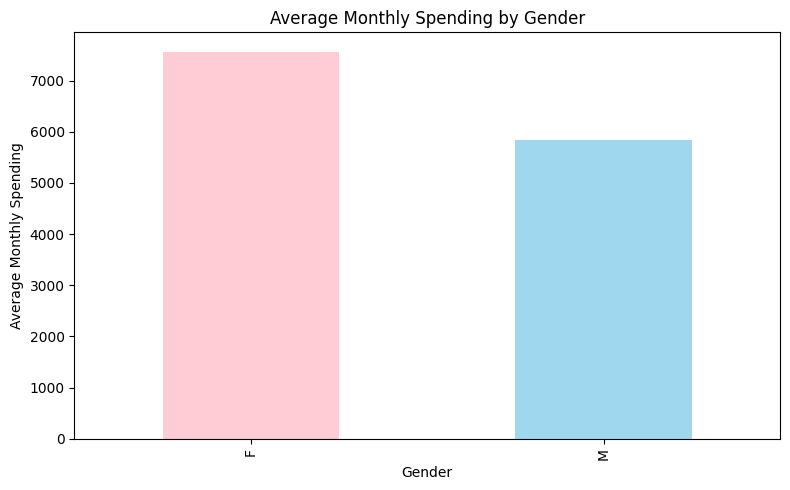

In [55]:
# Group by gender and plot monthly spending
gender_spending = final_df.groupby('gender')['total_monthly_spending'].mean()

# Plot
plt.figure(figsize=(8,5))
gender_spending.plot(kind = 'bar', color = ['pink', 'skyblue'], alpha = 0.8)
plt.title('Average Monthly Spending by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Monthly Spending')
plt.tight_layout()
plt.show()

Female spend more than male on a monthly average. This indicates that this feature is useful for predicting monthly spending of customers. 

#### [4.2] Job category

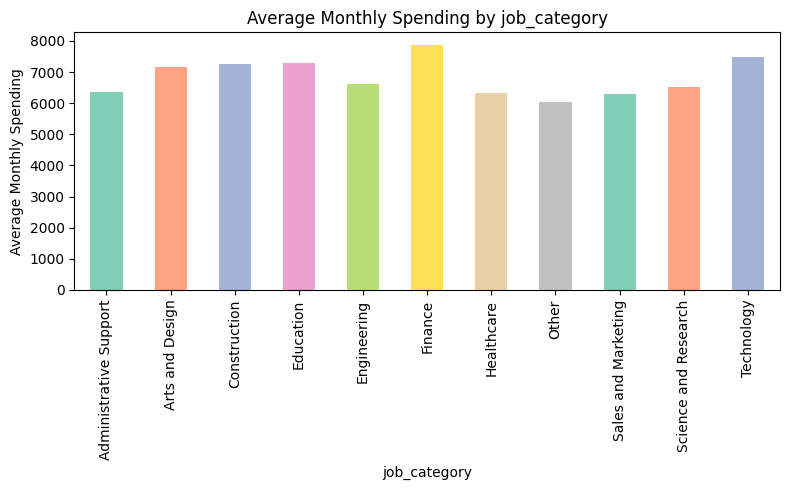

In [60]:
import seaborn as sns

# Group by job category and plot monthly spending
job_category_spending = final_df.groupby('job_category')['total_monthly_spending'].mean()

# Plot
plt.figure(figsize=(8,5))

# Choose a color palette from Seaborn
palette = sns.color_palette("Set2", n_colors=len(job_category_spending))

job_category_spending.plot(kind = 'bar', color = palette, alpha = 0.8)
plt.title('Average Monthly Spending by job_category')
plt.xlabel('job_category')
plt.ylabel('Average Monthly Spending')
plt.tight_layout()
plt.show()

C:\Users\sovan\AppData\Local\Temp\ipykernel_22952\424832915.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=final_df, x='age', y='total_monthly_spending', palette="viridis", alpha=0.9)


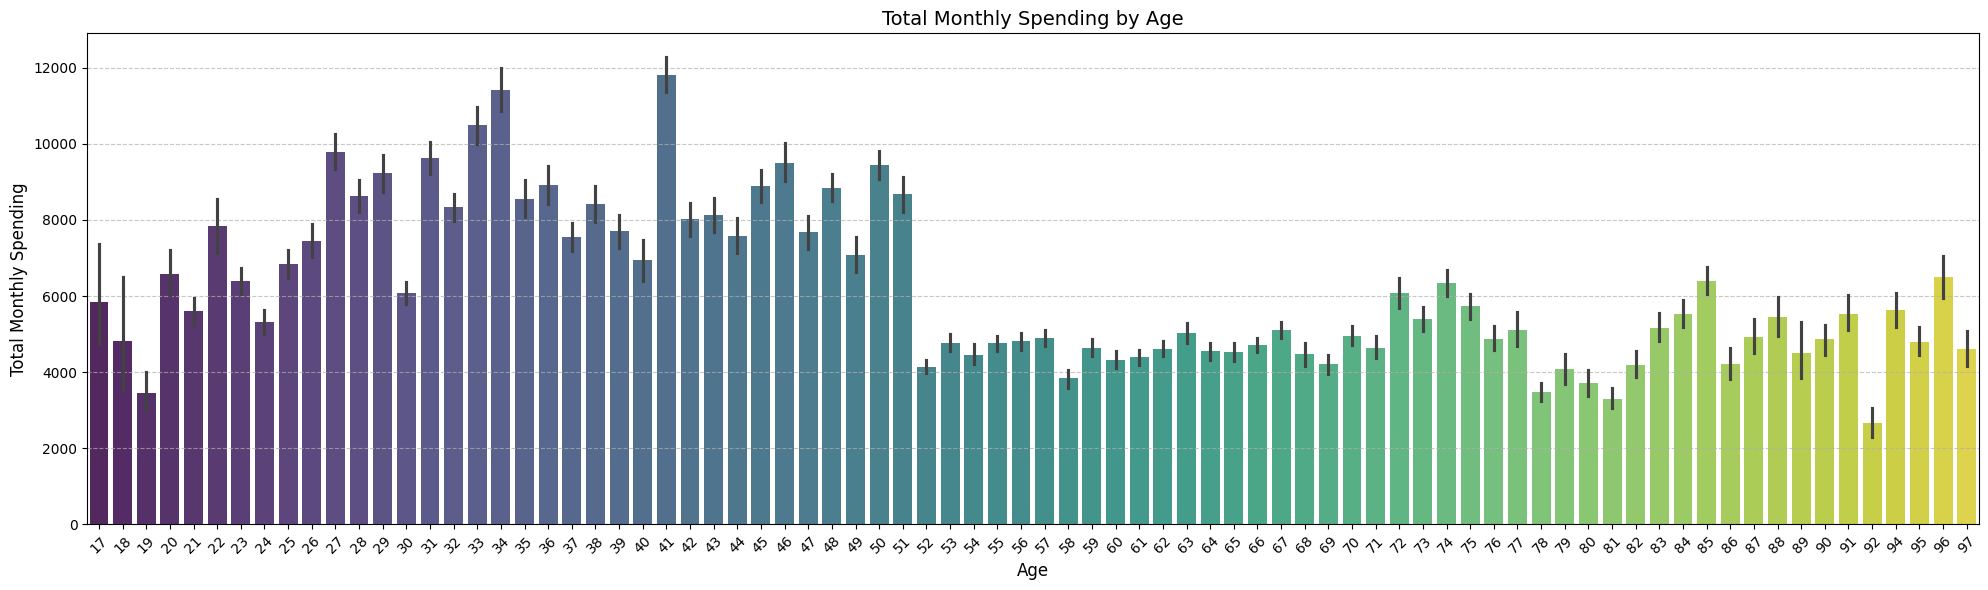

In [63]:
# Plot the data
plt.figure(figsize=(20, 6))
sns.barplot(data=final_df, x='age', y='total_monthly_spending', palette="viridis", alpha=0.9)

# Customize the plot
plt.title('Total Monthly Spending by Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Total Monthly Spending', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

#### [4.3] City Population

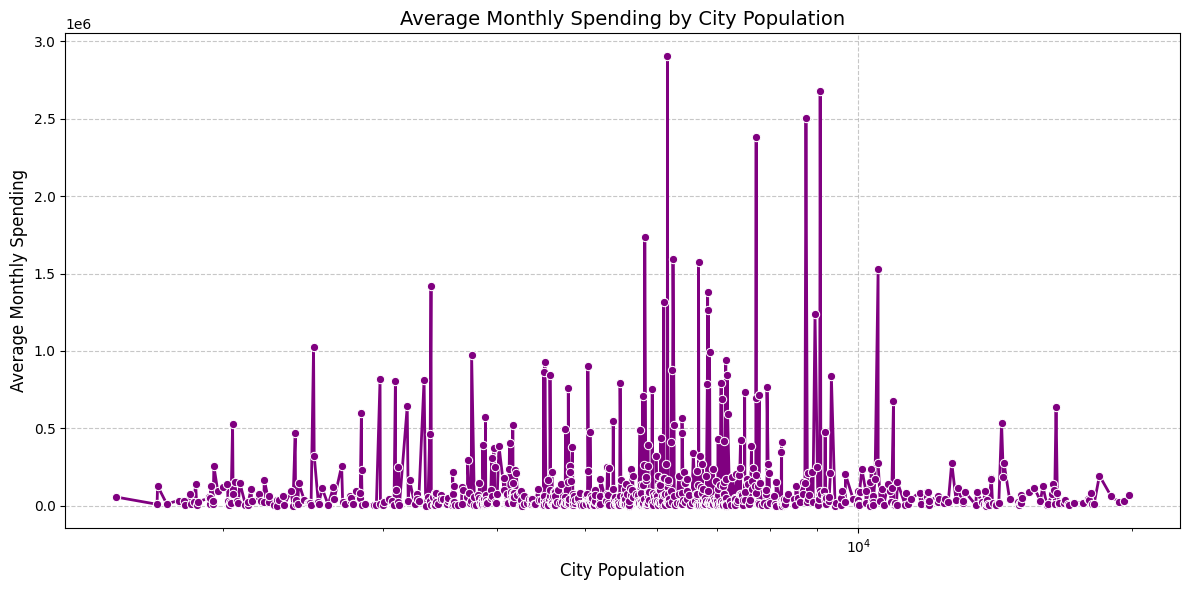

In [71]:
# Group by city population and calculate the mean monthly spending
grouped_data = final_df.groupby('city_pop')['total_monthly_spending'].mean().reset_index()

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='total_monthly_spending', y='city_pop', marker='o', color='purple', linewidth=2)

# Customize the plot
plt.title('Average Monthly Spending by City Population', fontsize=14)
plt.xlabel('City Population', fontsize=12)
plt.ylabel('Average Monthly Spending', fontsize=12)
plt.xscale('log')  # Log scale for wide ranges
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

It seems like it is not a clear positive relation between city population and monthly spending. Including city as a feature instead of city population might be more indicative for model to predict monthly spending

In [75]:
df_city = df[['city', 'cc_num']]

In [78]:
df_city = df_city.drop_duplicates()

In [79]:
df_city

,city,cc_num
0,Ambler,4218196001337
3278,Leland,4351161559407816183
4749,Cordova,4192832764832
10561,Birmingham,4238849696532874
13481,Fargo,4514627048281480
...,...,...
4235108,Denver,30125158904184
4241636,Wasco,180047909863618
4248164,Escondido,4371450311809
4253273,Mattapan,3519925692476886


In [80]:
new_df = pd.merge(final_df, df_city, on = 'cc_num', how = 'inner')

In [81]:
new_df

,cc_num,year,month,total_monthly_spending,spending_lag_1,spending_lag_2,spending_lag_3,entertainment,food_dining,gas_transport,...,personal_care,shopping_net,shopping_pos,travel,num_transactions,gender,city_pop,job_category,age,city
0,60400268763,2018,12,5.39,NaN,NaN,NaN,0.00,0.00,5.39,...,0.00,0.0,0.00,0.00,1,M,270712,Science and Research,67,Mobile
1,60400268763,2019,1,3152.91,5.39,NaN,NaN,0.00,0.00,3152.91,...,0.00,0.0,0.00,0.00,64,M,270712,Science and Research,67,Mobile
2,60400268763,2019,2,9242.60,3152.91,5.39,NaN,0.00,0.00,9242.60,...,0.00,0.0,0.00,0.00,58,M,270712,Science and Research,67,Mobile
3,60400268763,2019,3,5701.32,9242.60,3152.91,5.39,0.00,0.00,5701.32,...,0.00,0.0,0.00,0.00,92,M,270712,Science and Research,67,Mobile
4,60400268763,2019,4,6016.01,5701.32,9242.60,3152.91,0.00,0.00,6016.01,...,0.00,0.0,0.00,0.00,72,M,270712,Science and Research,67,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43797,4986226992066617996,2022,8,4962.25,6822.38,4743.58,4824.19,4452.26,340.38,0.00,...,0.00,0.0,169.61,0.00,127,M,9760,Healthcare,26,Wright City
43798,4986226992066617996,2022,9,4168.69,4962.25,6822.38,4743.58,0.00,4168.69,0.00,...,0.00,0.0,0.00,0.00,105,M,9760,Healthcare,26,Wright City
43799,4986226992066617996,2022,10,12604.28,4168.69,4962.25,6822.38,0.00,0.00,0.00,...,0.00,0.0,0.00,0.00,110,M,9760,Healthcare,26,Wright City
43800,4986226992066617996,2022,11,3604.19,12604.28,4168.69,4962.25,0.00,0.00,0.00,...,0.00,0.0,0.00,0.00,102,M,9760,Healthcare,26,Wright City


In [83]:
new_df = new_df.drop(['city_pop'], axis = 1)

In [84]:
new_df

,cc_num,year,month,total_monthly_spending,spending_lag_1,spending_lag_2,spending_lag_3,entertainment,food_dining,gas_transport,...,misc_pos,personal_care,shopping_net,shopping_pos,travel,num_transactions,gender,job_category,age,city
0,60400268763,2018,12,5.39,NaN,NaN,NaN,0.00,0.00,5.39,...,0.0,0.00,0.0,0.00,0.00,1,M,Science and Research,67,Mobile
1,60400268763,2019,1,3152.91,5.39,NaN,NaN,0.00,0.00,3152.91,...,0.0,0.00,0.0,0.00,0.00,64,M,Science and Research,67,Mobile
2,60400268763,2019,2,9242.60,3152.91,5.39,NaN,0.00,0.00,9242.60,...,0.0,0.00,0.0,0.00,0.00,58,M,Science and Research,67,Mobile
3,60400268763,2019,3,5701.32,9242.60,3152.91,5.39,0.00,0.00,5701.32,...,0.0,0.00,0.0,0.00,0.00,92,M,Science and Research,67,Mobile
4,60400268763,2019,4,6016.01,5701.32,9242.60,3152.91,0.00,0.00,6016.01,...,0.0,0.00,0.0,0.00,0.00,72,M,Science and Research,67,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43797,4986226992066617996,2022,8,4962.25,6822.38,4743.58,4824.19,4452.26,340.38,0.00,...,0.0,0.00,0.0,169.61,0.00,127,M,Healthcare,26,Wright City
43798,4986226992066617996,2022,9,4168.69,4962.25,6822.38,4743.58,0.00,4168.69,0.00,...,0.0,0.00,0.0,0.00,0.00,105,M,Healthcare,26,Wright City
43799,4986226992066617996,2022,10,12604.28,4168.69,4962.25,6822.38,0.00,0.00,0.00,...,0.0,0.00,0.0,0.00,0.00,110,M,Healthcare,26,Wright City
43800,4986226992066617996,2022,11,3604.19,12604.28,4168.69,4962.25,0.00,0.00,0.00,...,0.0,0.00,0.0,0.00,0.00,102,M,Healthcare,26,Wright City


### 5. One-hot encode and scaling